# - Instalação dos pacotes

In [ ]:
!pip install yfinance

In [ ]:
import pandas as pd 
import yfinance as yf 
import numpy as np
import math
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from scipy import stats
from scipy import optimize

# - Baixando os dados de Ações da B3

In [ ]:
acoes = ['ITUB3.SA', 'MGLU3.SA', 'CIEL3.SA', 'PETR3.SA', 'CSNA3.SA', '^BVSP']
acoes

['ITUB3.SA', 'MGLU3.SA', 'CIEL3.SA', 'PETR3.SA', 'CSNA3.SA', '^BVSP']

In [ ]:
acoes_df = pd.DataFrame()
for acao in acoes:
    acoes_df[acao] = yf.download(acao,
            start='2012-01-01', end='2023-03-17')['Close']
acoes_df.index = acoes_df.index.strftime('%Y-%m-%d')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
acoes_df.reset_index(inplace=True)
acoes_df

,Date,ITUB3.SA,MGLU3.SA,CIEL3.SA,PETR3.SA,CSNA3.SA,^BVSP
0,2012-01-02,12.845206,0.290625,9.715390,23.209999,15.110000,NaN
1,2012-01-03,13.072877,0.288750,9.751559,24.020000,15.890000,59265.0
2,2012-01-04,13.195819,0.285937,9.785718,24.170000,16.000000,59365.0
3,2012-01-05,12.990915,0.283437,9.645061,24.020000,15.870000,58546.0
4,2012-01-06,13.182159,0.291250,9.584780,24.000000,15.830000,58600.0
...,...,...,...,...,...,...,...
2776,2023-03-10,20.830000,3.400000,5.100000,28.400000,15.920000,103618.0
2777,2023-03-13,20.559999,3.720000,5.090000,27.500000,16.059999,103121.0
2778,2023-03-14,20.500000,3.730000,5.140000,27.010000,15.720000,102932.0
2779,2023-03-15,20.530001,3.810000,5.100000,26.350000,14.770000,102675.0


# - Visualização dos Dados


In [55]:
acoes = acoes_df.copy()
#acoes.drop(labels = ['^BVSP'], axis=1, inplace=True)
figura = px.line(title = 'Histórico do preço das ações')
for i in acoes.columns[1:]:
  figura.add_scatter(x = acoes["Date"] ,y = acoes[i], name = i)
figura.show()

# - Taxa de Retorno 

## $$\mathbb{E}(R_{i})=log\left(\frac{P_{t}}{P_{t-1}}\right)$$

In [ ]:
dataset = acoes_df.copy()
dataset.drop(labels = ['Date'], axis=1, inplace=True)
taxas_retorno = np.log(dataset / dataset.shift(1))
dataset_date = acoes_df.copy()
date = dataset_date.filter(["Date"]) 
taxas_retorno = pd.concat([date, taxas_retorno], axis=1)
taxas_retorno

,Date,ITUB3.SA,MGLU3.SA,CIEL3.SA,PETR3.SA,CSNA3.SA,^BVSP
0,2012-01-02,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-01-03,0.017569,-0.006473,0.003716,0.034304,0.050333,NaN
2,2012-01-04,0.009360,-0.009790,0.003497,0.006225,0.006899,0.001686
3,2012-01-05,-0.015650,-0.008782,-0.014478,-0.006225,-0.008158,-0.013892
4,2012-01-06,0.014614,0.027192,-0.006270,-0.000833,-0.002524,0.000922
...,...,...,...,...,...,...,...
2776,2023-03-10,-0.023251,0.002946,-0.025171,-0.007018,-0.038206,-0.013925
2777,2023-03-13,-0.013047,0.089948,-0.001963,-0.032203,0.008755,-0.004808
2778,2023-03-14,-0.002923,0.002685,0.009775,-0.017979,-0.021398,-0.001834
2779,2023-03-15,0.001462,0.021221,-0.007813,-0.024739,-0.062336,-0.002500


In [ ]:
taxas_retorno.describe()

,ITUB3.SA,MGLU3.SA,CIEL3.SA,PETR3.SA,CSNA3.SA,^BVSP
count,2780.000000,2780.000000,2780.000000,2780.000000,2780.000000,2763.000000
mean,0.000170,0.000933,-0.000230,0.000044,-0.000008,0.000178
std,0.018959,0.038979,0.025972,0.031182,0.036752,0.015721
min,-0.224042,-0.236698,-0.237959,-0.352054,-0.291590,-0.159930
25%,-0.010198,-0.019262,-0.013610,-0.015166,-0.021006,-0.008231
50%,0.000000,0.000000,-0.000179,0.000000,0.000000,0.000273
75%,0.010329,0.019661,0.012431,0.015581,0.019406,0.008998
max,0.111068,0.316924,0.210721,0.205024,0.189137,0.130223


In [ ]:
import warnings
warnings.filterwarnings("ignore")
taxas_retorno.mean()*100

ITUB3.SA    0.016955
MGLU3.SA    0.093314
CIEL3.SA   -0.023042
PETR3.SA    0.004427
CSNA3.SA   -0.000794
^BVSP       0.017846
dtype: float64

In [ ]:
dataset = taxas_retorno.copy()
dataset.drop(labels = ['Date'], axis=1, inplace=True)
dataset.std()*100

ITUB3.SA    1.895928
MGLU3.SA    3.897853
CIEL3.SA    2.597162
PETR3.SA    3.118195
CSNA3.SA    3.675178
^BVSP       1.572064
dtype: float64

In [ ]:
figura = px.line(title = 'Histórico de retorno das ações')
for i in taxas_retorno.columns[1:]:
  figura.add_scatter(x = taxas_retorno["Date"] ,y = taxas_retorno[i], name = i)
figura.show()

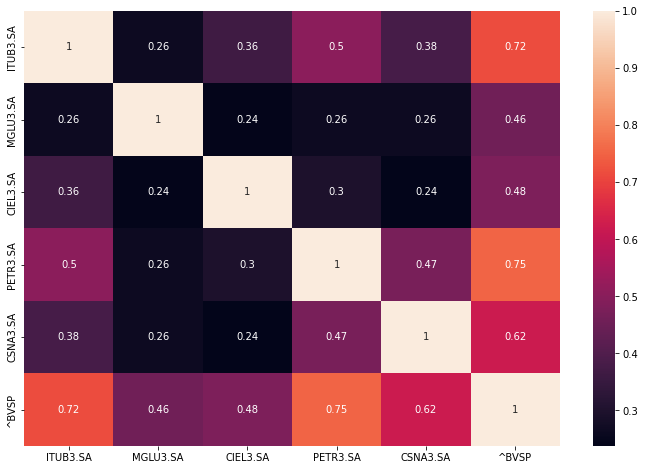

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(taxas_retorno.corr(), annot=True);

# Montando uma Carteira de Ativos - Simulação da Fronteira Eficiente

In [ ]:
acoes_port = acoes_df.copy()
acoes_port.drop(labels = ['^BVSP'], axis=1, inplace=True)
log_ret = acoes_port.copy()
log_ret.drop(labels = ["Date"], axis = 1, inplace = True)
log_ret = np.log(log_ret/log_ret.shift(1))
np.random.seed(42)
num_ports = 10000
all_weights = np.zeros((num_ports, len(acoes_port.columns[1:])))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for x in range(num_ports):
    # Weights
    weights = np.array(np.random.random(5))
    weights = weights/np.sum(weights)
    
    # Save weights
    all_weights[x,:] = weights
    
    # Expected return
    ret_arr[x] = np.sum((log_ret.mean() * weights))
    
    # Expected volatility
    vol_arr[x] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov(), weights)))
    
    # Sharpe Ratio
    sharpe_arr[x] = ret_arr[x]/vol_arr[x]

In [ ]:
print("Max Sharpe Ratio: {}". format(sharpe_arr.max()))
print("Local do Max Sharpe Ratio: {}". format(sharpe_arr.argmax()))

Max Sharpe Ratio: 0.023339769683230843
Local do Max Sharpe Ratio: 7063


In [ ]:
# Pesos do Portfólio do Max Sharpe Ratio
print(all_weights[7063,:])

[0.32020505 0.62806883 0.01391511 0.01269245 0.02511856]


In [ ]:
# salvando os dados do Max Sharpe Ratio
max_sr_ret = ret_arr[sharpe_arr.argmax()]
max_sr_vol = vol_arr[sharpe_arr.argmax()]
print(max_sr_ret*100)
print(max_sr_vol*100)

0.06375234166878897
2.73148975050057


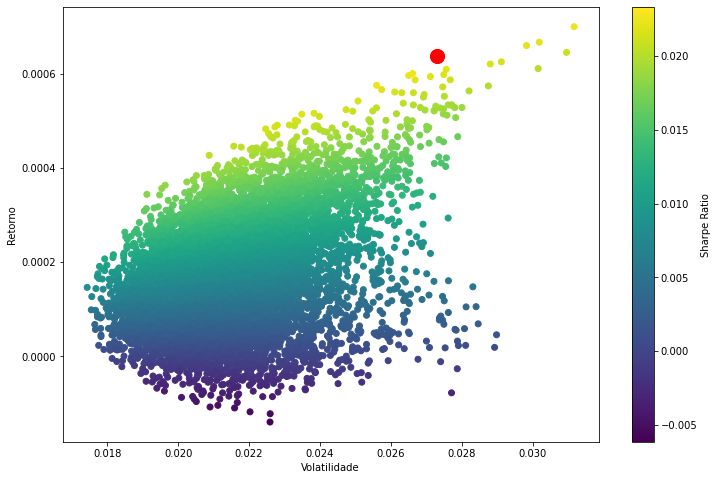

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatilidade')
plt.ylabel('Retorno')
plt.scatter(max_sr_vol, max_sr_ret,c='red', s=200) # black dot
plt.show()

In [ ]:
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights)
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov(), weights)))
    sr = ret/vol
    return np.array([ret, vol, sr])

def neg_sharpe(weights):
# the number 2 is the sharpe ratio index from the get_ret_vol_sr
    return get_ret_vol_sr(weights)[2] * -1

def check_sum(weights):
    #return 0 if sum of the weights is 1
    return np.sum(weights)-1

In [ ]:
cons = ({'type': 'eq', 'fun': check_sum})
bounds = ((0,1), (0,1), (0,1), (0,1), (0,1))
init_guess = ((0.2),(0.2),(0.2),(0.2),(0.2))

In [ ]:
op_results = optimize.minimize(neg_sharpe, init_guess, method="SLSQP", bounds= bounds, constraints=cons)
print(op_results)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.024072888478624502
       x: [ 2.559e-01  7.441e-01  0.000e+00  6.939e-18  1.973e-17]
     nit: 7
     jac: [ 5.521e-04 -1.899e-04  1.336e-02  6.631e-03  9.208e-03]
    nfev: 42
    njev: 7


In [ ]:
frontier_y = np.linspace(0.000, 0.0007, 250)

In [ ]:
def minimize_volatility(weights):
    return get_ret_vol_sr(weights)[1]

In [ ]:
frontier_x = []

for possible_return in frontier_y:
    cons = ({'type':'eq', 'fun':check_sum},
            {'type':'eq', 'fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = optimize.minimize(minimize_volatility,init_guess,method='SLSQP', bounds=bounds, constraints=cons)
    frontier_x.append(result['fun'])

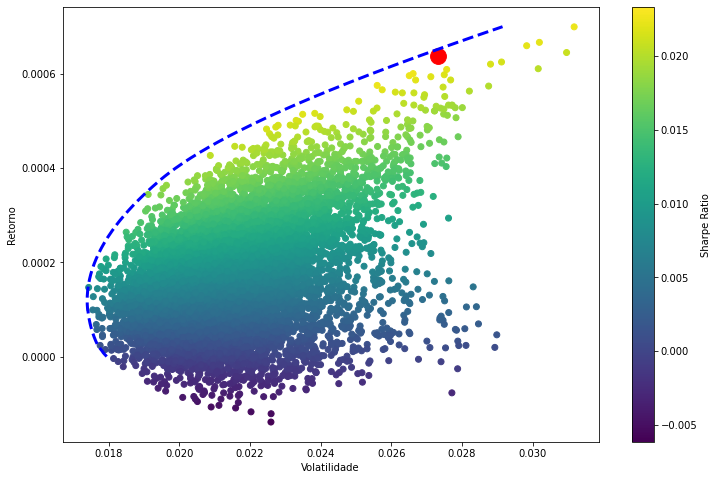

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatilidade')
plt.ylabel('Retorno')
plt.plot(frontier_x,frontier_y, 'b--', linewidth=3)
plt.scatter(max_sr_vol, max_sr_ret,c='red', s=250)
# plt.savefig('cover.png')
plt.show()

# Alocação Aleatória de Ativos - Portfólio Markowitz


In [ ]:
acoes_port = acoes_df.copy()
acoes_port.drop(labels = ['^BVSP'], axis=1, inplace=True)
acoes_port

,Date,ITUB3.SA,MGLU3.SA,CIEL3.SA,PETR3.SA,CSNA3.SA
0,2012-01-02,12.845206,0.290625,9.715390,23.209999,15.110000
1,2012-01-03,13.072877,0.288750,9.751559,24.020000,15.890000
2,2012-01-04,13.195819,0.285937,9.785718,24.170000,16.000000
3,2012-01-05,12.990915,0.283437,9.645061,24.020000,15.870000
4,2012-01-06,13.182159,0.291250,9.584780,24.000000,15.830000
...,...,...,...,...,...,...
2776,2023-03-10,20.830000,3.400000,5.100000,28.400000,15.920000
2777,2023-03-13,20.559999,3.720000,5.090000,27.500000,16.059999
2778,2023-03-14,20.500000,3.730000,5.140000,27.010000,15.720000
2779,2023-03-15,20.530001,3.810000,5.100000,26.350000,14.770000


In [ ]:
def alocacao_ativos(dataset, dinheiro_total, seed = 0, melhores_pesos = []):
  dataset = dataset.copy()

  if seed != 0:
    np.random.seed(seed)

  if len(melhores_pesos) > 0:
    pesos = melhores_pesos
  else:  
    pesos = np.random.random(len(dataset.columns) - 1)
    #print(pesos, pesos.sum())
    pesos = pesos / pesos.sum()
    #print(pesos, pesos.sum())

  colunas = dataset.columns[1:]
  #print(colunas)
  for i in colunas:
    dataset[i] = (dataset[i] / dataset[i][0])

  for i, acao in enumerate(dataset.columns[1:]):
    #print(i, acao)
    dataset[acao] = dataset[acao] * pesos[i] * dinheiro_total
  
  dataset['soma valor'] = dataset.sum(axis = 1)

  datas = dataset['Date']
  #print(datas)

  dataset.drop(labels = ['Date'], axis = 1, inplace = True)
  dataset['taxa retorno'] = 0.0

  for i in range(1, len(dataset)):
    dataset['taxa retorno'][i] = np.log(dataset['soma valor'][i] / dataset['soma valor'][i - 1]) * 100

  acoes_pesos = pd.DataFrame(data = {'Ações': colunas, 'Pesos': pesos})

  return dataset, datas, acoes_pesos, dataset.loc[len(dataset) - 1]['soma valor']

In [ ]:
dataset, datas, acoes_pesos, soma_valor = alocacao_ativos(acoes_port, 10000, 0, 
                                                          [0.32020505, 0.62806883, 0.01391511, 0.01269245,
                                                           0.02511856])
dataset

,ITUB3.SA,MGLU3.SA,CIEL3.SA,PETR3.SA,CSNA3.SA,soma valor,taxa retorno
0,3202.050500,6280.688300,139.151100,126.924500,251.185600,10000.000000,0.000000
1,3258.804200,6240.167448,139.669140,131.354014,264.152175,10034.146977,0.340888
2,3289.451150,6179.376187,140.158387,132.174291,265.980787,10007.140802,-0.269506
3,3238.372820,6125.348813,138.143786,131.354014,263.819691,9897.039124,-1.106328
4,3286.046118,6294.194821,137.280399,131.244641,263.154740,10111.920720,2.147936
...,...,...,...,...,...,...,...
2776,5192.498300,73477.300236,73.046021,155.306157,264.650884,79162.801598,0.101994
2777,5125.192639,80392.809210,72.902797,150.384485,266.978206,86008.267336,8.293691
2778,5110.235984,80608.918704,73.618930,147.704908,261.326128,86201.804653,0.224769
2779,5117.714549,82337.794659,73.046021,144.095681,245.533522,87918.184432,1.971555


In [ ]:
acoes_pesos

,Ações,Pesos
0,ITUB3.SA,0.320205
1,MGLU3.SA,0.628069
2,CIEL3.SA,0.013915
3,PETR3.SA,0.012692
4,CSNA3.SA,0.025119


In [ ]:
soma_valor

89659.43516537591

In [ ]:
figura = px.line(x = datas, y = dataset['taxa retorno'], title = 'Retorno diário do portfólio',
                labels=dict(x="Data", y="Retorno %"))
figura.add_hline(y = dataset['taxa retorno'].mean(), line_color="red", line_dash="dot", )
figura.show()

In [ ]:
figura = px.line(title = 'Evolução do patrimônio')
for i in dataset.drop(columns = ['soma valor', 'taxa retorno']).columns:
  figura.add_scatter(x = datas, y = dataset[i], name = i)
figura.show()

In [ ]:
figura = px.line(x = datas, y = dataset['soma valor'], 
                 title = 'Evolução do patrimônio da Carteira',
                 labels=dict(x="Data", y="Valor R$"))
figura.add_hline(y = dataset['soma valor'].mean(), 
                 line_color="green", line_dash="dot", )
figura.add_hline(y = 10000, 
                 line_color="red", line_dash="dot", )
figura.show()